# Capstone Project - Dog Cat Net

<br>

## Convolutional Neural Networks

## Goal: Write an Algorithm for a Dog/Cat Identification App 


<br><br>
### Import Dog and Cat Dataset


In [101]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import os, random, cv2


training_path = 'dogcatImages/train/'
testing_path = 'dogcatImages/test/'

train_images = [training_path+i for i in os.listdir(training_path)] 
train_dogs =   [training_path+i for i in os.listdir(training_path) if 'dog' in i]
train_cats =   [training_path+i for i in os.listdir(training_path) if 'cat' in i]

test_images =  [testing_path+i for i in os.listdir(testing_path)]
test_save = test_images
print('train_images.shape | {0}'.format(len(train_images)))
print('test_images.shape   | {0}'.format(len(test_images)))

train_target = []
test_images = test_images[:5000]

train_images = train_dogs[:6500] + train_cats[:6500]
train_targets = np.append(np.ones(6500), np.zeros(6500))
train_images, valid_images, train_targets, valid_targets = train_test_split(train_images, train_targets, test_size=0.20, random_state=10)

print("Train shape: {}".format(len(train_images)))
print("valid shape: {}".format(len(valid_images)))
print("Test shape: {}".format(len(test_images)))


train_images.shape | 25000
test_images.shape   | 12500
Train shape: 10400
valid shape: 2600
Test shape: 5000


### Data Preprocessing

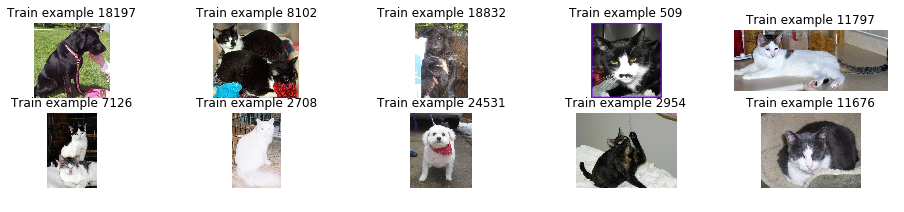

In [38]:
imgs = os.listdir(training_path)
n = np.random.randint(0,25000,10)

plt.figure(figsize=(16,8))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.title("Train example %d"%n[i])
    img = plt.imread(training_path+imgs[n[i]])
    plt.axis("off")
    plt.imshow(img)
plt.show()

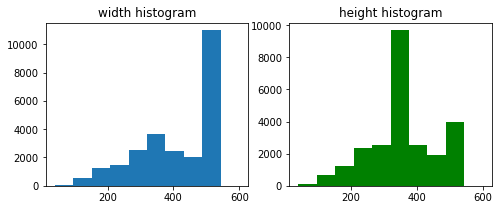

Mean width : 404.09904
Mean height : 360.47808


In [42]:
width_hist = []
height_hist = []
i = 0
for name in imgs:
    img = plt.imread(training_path+name)
    width_hist.append(img.shape[1])
    height_hist.append(img.shape[0])
    i += 1
    
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.title("width histogram")
plt.hist(width_hist, range=(40,600))
plt.subplot(1,2,2)
plt.title("height histogram")
plt.hist(height_hist, range=(40,600), color="g")
plt.show()

print ("Mean width :", np.mean(width_hist))
print ("Mean height :", np.mean(height_hist))

In [43]:
from keras.preprocessing import image                  
from tqdm import tqdm
import numpy as np 

def path_to_tensor(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 
train_images = paths_to_tensor(train_images).astype('float32')/255
valid_images = paths_to_tensor(valid_images).astype('float32')/255
test_images = paths_to_tensor(test_images[:100]).astype('float32')/255








  0%|          | 0/10400 [00:00<?, ?it/s]






  0%|          | 18/10400 [00:00<00:59, 175.13it/s]






  0%|          | 36/10400 [00:00<00:59, 173.70it/s]






  1%|          | 54/10400 [00:00<01:00, 172.14it/s]






  1%|          | 70/10400 [00:00<01:01, 167.08it/s]






  1%|          | 88/10400 [00:00<01:01, 168.03it/s]






  1%|          | 106/10400 [00:00<01:01, 168.44it/s]






  1%|          | 123/10400 [00:00<01:01, 166.97it/s]






  1%|▏         | 139/10400 [00:00<01:02, 164.55it/s]






  1%|▏         | 155/10400 [00:00<01:03, 161.69it/s]






  2%|▏         | 173/10400 [00:01<01:02, 162.56it/s]






  2%|▏         | 190/10400 [00:01<01:02, 162.61it/s]






  2%|▏         | 206/10400 [00:01<01:03, 161.62it/s]






  2%|▏         | 223/10400 [00:01<01:02, 161.75it/s]






  2%|▏         | 241/10400 [00:01<01:02, 162.22it/s]






  2%|▏         | 258/10400 [00:01<01:02, 161.79it/s]






  3%|▎         | 274/10400 [00:01<01:04, 157.61it/s]






  3%|▎

 16%|█▌        | 1644/10400 [00:11<00:58, 149.12it/s]






 16%|█▌        | 1660/10400 [00:11<00:58, 149.19it/s]






 16%|█▌        | 1676/10400 [00:11<00:58, 149.18it/s]






 16%|█▋        | 1692/10400 [00:11<00:58, 149.14it/s]






 16%|█▋        | 1709/10400 [00:11<00:58, 149.31it/s]






 17%|█▋        | 1726/10400 [00:11<00:58, 149.48it/s]






 17%|█▋        | 1742/10400 [00:11<00:57, 149.47it/s]






 17%|█▋        | 1758/10400 [00:11<00:57, 149.55it/s]






 17%|█▋        | 1774/10400 [00:11<00:57, 149.60it/s]






 17%|█▋        | 1792/10400 [00:11<00:57, 149.80it/s]






 17%|█▋        | 1809/10400 [00:12<00:57, 149.94it/s]






 18%|█▊        | 1826/10400 [00:12<00:57, 149.86it/s]






 18%|█▊        | 1842/10400 [00:12<00:57, 149.71it/s]






 18%|█▊        | 1858/10400 [00:12<00:57, 149.76it/s]






 18%|█▊        | 1877/10400 [00:12<00:56, 150.02it/s]






 18%|█▊        | 1894/10400 [00:12<00:56, 149.90it/s]






 18%|█▊        | 1910/10400 [00:12<00:56

 32%|███▏      | 3286/10400 [00:22<00:47, 149.33it/s]






 32%|███▏      | 3300/10400 [00:22<00:47, 149.27it/s]






 32%|███▏      | 3314/10400 [00:22<00:47, 149.17it/s]






 32%|███▏      | 3329/10400 [00:22<00:47, 149.17it/s]






 32%|███▏      | 3343/10400 [00:22<00:47, 149.12it/s]






 32%|███▏      | 3358/10400 [00:22<00:47, 149.11it/s]






 32%|███▏      | 3373/10400 [00:22<00:47, 149.09it/s]






 33%|███▎      | 3389/10400 [00:22<00:47, 149.13it/s]






 33%|███▎      | 3404/10400 [00:22<00:46, 149.05it/s]






 33%|███▎      | 3419/10400 [00:22<00:46, 148.90it/s]






 33%|███▎      | 3433/10400 [00:23<00:46, 148.86it/s]






 33%|███▎      | 3447/10400 [00:23<00:46, 148.73it/s]






 33%|███▎      | 3461/10400 [00:23<00:46, 148.61it/s]






 33%|███▎      | 3477/10400 [00:23<00:46, 148.62it/s]






 34%|███▎      | 3491/10400 [00:23<00:46, 148.49it/s]






 34%|███▎      | 3505/10400 [00:23<00:46, 148.38it/s]






 34%|███▍      | 3519/10400 [00:23<00:46

 46%|████▌     | 4800/10400 [00:33<00:38, 145.17it/s]






 46%|████▋     | 4815/10400 [00:33<00:38, 145.16it/s]






 46%|████▋     | 4831/10400 [00:33<00:38, 145.20it/s]






 47%|████▋     | 4848/10400 [00:33<00:38, 145.23it/s]






 47%|████▋     | 4863/10400 [00:33<00:38, 145.22it/s]






 47%|████▋     | 4879/10400 [00:33<00:38, 145.25it/s]






 47%|████▋     | 4894/10400 [00:33<00:37, 145.26it/s]






 47%|████▋     | 4912/10400 [00:33<00:37, 145.34it/s]






 47%|████▋     | 4928/10400 [00:33<00:37, 145.36it/s]






 48%|████▊     | 4944/10400 [00:34<00:37, 145.40it/s]






 48%|████▊     | 4960/10400 [00:34<00:37, 145.41it/s]






 48%|████▊     | 4977/10400 [00:34<00:37, 145.48it/s]






 48%|████▊     | 4995/10400 [00:34<00:37, 145.57it/s]






 48%|████▊     | 5012/10400 [00:34<00:37, 145.60it/s]






 48%|████▊     | 5030/10400 [00:34<00:36, 145.67it/s]






 49%|████▊     | 5047/10400 [00:34<00:36, 145.70it/s]






 49%|████▊     | 5064/10400 [00:34<00:36

 62%|██████▏   | 6427/10400 [00:43<00:27, 146.16it/s]






 62%|██████▏   | 6443/10400 [00:44<00:27, 146.17it/s]






 62%|██████▏   | 6459/10400 [00:44<00:26, 146.17it/s]






 62%|██████▏   | 6475/10400 [00:44<00:26, 146.18it/s]






 62%|██████▏   | 6492/10400 [00:44<00:26, 146.23it/s]






 63%|██████▎   | 6508/10400 [00:44<00:26, 146.23it/s]






 63%|██████▎   | 6524/10400 [00:44<00:26, 146.21it/s]






 63%|██████▎   | 6539/10400 [00:44<00:26, 146.22it/s]






 63%|██████▎   | 6554/10400 [00:44<00:26, 146.22it/s]






 63%|██████▎   | 6569/10400 [00:44<00:26, 146.19it/s]






 63%|██████▎   | 6584/10400 [00:45<00:26, 146.19it/s]






 63%|██████▎   | 6599/10400 [00:45<00:25, 146.19it/s]






 64%|██████▎   | 6616/10400 [00:45<00:25, 146.24it/s]






 64%|██████▍   | 6633/10400 [00:45<00:25, 146.27it/s]






 64%|██████▍   | 6649/10400 [00:45<00:25, 146.29it/s]






 64%|██████▍   | 6666/10400 [00:45<00:25, 146.32it/s]






 64%|██████▍   | 6683/10400 [00:45<00:25

 77%|███████▋  | 7964/10400 [00:55<00:16, 144.32it/s]






 77%|███████▋  | 7977/10400 [00:55<00:16, 144.27it/s]






 77%|███████▋  | 7991/10400 [00:55<00:16, 144.26it/s]






 77%|███████▋  | 8005/10400 [00:55<00:16, 144.24it/s]






 77%|███████▋  | 8018/10400 [00:55<00:16, 144.21it/s]






 77%|███████▋  | 8034/10400 [00:55<00:16, 144.24it/s]






 77%|███████▋  | 8048/10400 [00:55<00:16, 144.22it/s]






 78%|███████▊  | 8062/10400 [00:55<00:16, 144.20it/s]






 78%|███████▊  | 8076/10400 [00:56<00:16, 144.17it/s]






 78%|███████▊  | 8090/10400 [00:56<00:16, 144.15it/s]






 78%|███████▊  | 8104/10400 [00:56<00:15, 144.14it/s]






 78%|███████▊  | 8121/10400 [00:56<00:15, 144.17it/s]






 78%|███████▊  | 8136/10400 [00:56<00:15, 144.04it/s]






 78%|███████▊  | 8149/10400 [00:56<00:15, 143.88it/s]






 78%|███████▊  | 8164/10400 [00:56<00:15, 143.89it/s]






 79%|███████▊  | 8177/10400 [00:56<00:15, 143.85it/s]






 79%|███████▉  | 8190/10400 [00:56<00:15

 92%|█████████▏| 9550/10400 [01:06<00:05, 144.58it/s]






 92%|█████████▏| 9566/10400 [01:06<00:05, 144.60it/s]






 92%|█████████▏| 9582/10400 [01:06<00:05, 144.61it/s]






 92%|█████████▏| 9598/10400 [01:06<00:05, 144.62it/s]






 92%|█████████▏| 9614/10400 [01:06<00:05, 144.62it/s]






 93%|█████████▎| 9630/10400 [01:06<00:05, 144.62it/s]






 93%|█████████▎| 9646/10400 [01:06<00:05, 144.64it/s]






 93%|█████████▎| 9663/10400 [01:06<00:05, 144.67it/s]






 93%|█████████▎| 9681/10400 [01:06<00:04, 144.72it/s]






 93%|█████████▎| 9699/10400 [01:06<00:04, 144.77it/s]






 93%|█████████▎| 9716/10400 [01:07<00:04, 144.77it/s]






 94%|█████████▎| 9732/10400 [01:07<00:04, 144.78it/s]






 94%|█████████▎| 9749/10400 [01:07<00:04, 144.82it/s]






 94%|█████████▍| 9767/10400 [01:07<00:04, 144.86it/s]






 94%|█████████▍| 9784/10400 [01:07<00:04, 144.85it/s]






 94%|█████████▍| 9800/10400 [01:07<00:04, 144.87it/s]






 94%|█████████▍| 9816/10400 [01:07<00:04

 30%|███       | 780/2600 [00:04<00:11, 157.87it/s]






 31%|███       | 796/2600 [00:05<00:11, 157.69it/s]






 31%|███       | 812/2600 [00:05<00:11, 157.34it/s]






 32%|███▏      | 828/2600 [00:05<00:11, 156.04it/s]






 32%|███▏      | 844/2600 [00:05<00:11, 155.98it/s]






 33%|███▎      | 861/2600 [00:05<00:11, 156.21it/s]






 34%|███▍      | 881/2600 [00:05<00:10, 156.87it/s]






 35%|███▍      | 899/2600 [00:05<00:10, 157.14it/s]






 35%|███▌      | 917/2600 [00:05<00:10, 157.32it/s]






 36%|███▌      | 934/2600 [00:05<00:10, 157.34it/s]






 37%|███▋      | 951/2600 [00:06<00:10, 157.41it/s]






 37%|███▋      | 968/2600 [00:06<00:10, 156.97it/s]






 38%|███▊      | 988/2600 [00:06<00:10, 157.55it/s]






 39%|███▊      | 1005/2600 [00:06<00:10, 157.51it/s]






 39%|███▉      | 1022/2600 [00:06<00:10, 157.27it/s]






 40%|███▉      | 1039/2600 [00:06<00:09, 157.41it/s]






 41%|████      | 1055/2600 [00:06<00:09, 157.35it/s]






 41%|████▏

 98%|█████████▊| 2535/2600 [00:15<00:00, 159.34it/s]






 98%|█████████▊| 2551/2600 [00:16<00:00, 159.27it/s]






 99%|█████████▉| 2568/2600 [00:16<00:00, 159.29it/s]






 99%|█████████▉| 2585/2600 [00:16<00:00, 159.31it/s]






100%|██████████| 2600/2600 [00:16<00:00, 159.24it/s]






  0%|          | 0/100 [00:00<?, ?it/s]






 14%|█▍        | 14/100 [00:00<00:00, 135.28it/s]






 31%|███       | 31/100 [00:00<00:00, 149.21it/s]






 45%|████▌     | 45/100 [00:00<00:00, 145.51it/s]






 58%|█████▊    | 58/100 [00:00<00:00, 141.40it/s]






 74%|███████▍  | 74/100 [00:00<00:00, 143.45it/s]






 90%|█████████ | 90/100 [00:00<00:00, 145.34it/s]






100%|██████████| 100/100 [00:00<00:00, 147.47it/s]

---
<a id='step1'></a>
## Benchmark

In [44]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils import plot_model

#Initializing the neural network as a sequential network from keras.models
classifier = Sequential()

#Import Conv2D from keras.layers to perform convolution operation on 2D images
classifier.add(Conv2D(16, activation='relu', input_shape=(224, 224, 3), kernel_size=(2, 2)))
#Import MaxPooling2D from keras.layers to get the maximum value pixel from region of interest
classifier.add(MaxPooling2D(pool_size=(2, 2)))
#Import Flatten from keras.layers to convert 2D arrays to liner vector.
classifier.add(Flatten())

#Import Dense from keras.layers to build the fully connected layer 
classifier.add(Dense(2, activation='softmax'))
classifier.summary()

# Compile the benchmark architecture with adam optimizer and cross entropy loss.
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the Benchmark

from keras.callbacks import ModelCheckpoint  
epochs = 4
checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.benchmark_from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

history_cnn = classifier.fit(train_images[:10000], train_targets[:10000], 
          validation_data=(valid_images[:2500], valid_targets[:2500]),
          epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 223, 223, 16)      208       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 111, 111, 16)      0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 197136)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 394274    
Total params: 394,482
Trainable params: 394,482
Non-trainable params: 0
_________________________________________________________________


Train on 10000 samples, validate on 2500 samples
Epoch 1/4
10000/10000 [==============================] - 108s 11ms/step - loss: 8.0318 - acc: 0.5000 - val_loss: 7.9946 - val_acc: 0.5040
Epoch 2/4
10000/10000 [==============================] - 105s 10ms/step - loss: 8.0639 - acc: 0.4997 - val_loss: 7.9946 - val_acc: 0.5040
Epoch 3/4
10000/10000 [==============================] - 104s 10ms/step - loss: 8.0639 - acc: 0.4997 - val_loss: 7.9946 - val_acc: 0.5040
Epoch 4/4
10000/10000 [==============================] - 103s 10ms/step - loss: 8.0639 - acc: 0.4997 - val_loss: 7.9946 - val_acc: 0.5040



### Model Architecture


In [49]:
from keras.layers import Conv2D, Convolution2D, MaxPooling2D, GlobalAveragePooling2D
classifier = Sequential()
# First Convolutional Layer
classifier.add(Conv2D(16, kernel_size=(2, 2), activation='relu', input_shape=(224, 224, 3)))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
# 2nd Convolutional Layer
classifier.add(Conv2D(32, kernel_size=(2, 2), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
# 3rd Convolutional Layer
classifier.add(Conv2D(64, kernel_size=(2, 2), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Conv2D(64, kernel_size=(2, 2), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Convolution2D(4, 3, 3, border_mode='same', activation='relu'))
classifier.add(Flatten())
classifier.add(Dense(2, activation='softmax'))

classifier.summary()
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/Users/elo155/.virtualenvs/MLDog/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(4, (3, 3), activation="relu", padding="same")`
  








_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 223, 223, 16)      208       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 110, 110, 32)      2080      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 55, 55, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 54, 54, 64)        8256      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 27, 27, 64)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 26, 26, 64)        16448     
__________

In [53]:

from keras.callbacks import ModelCheckpoint  

epochs = 8

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.from_new_scratch.hdf5', 
                               verbose=1, save_best_only=True)

history_cnn = classifier.fit(train_images[:10000], train_targets[:10000], 
          validation_data=(valid_images[:2500], valid_targets[:2500]),
          epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 10000 samples, validate on 2500 samples
Epoch 1/8
10000/10000 [==============================] - 214s 21ms/step - loss: 0.3221 - acc: 0.8601 - val_loss: 0.3580 - val_acc: 0.8340
Epoch 2/8
10000/10000 [==============================] - 201s 20ms/step - loss: 0.2985 - acc: 0.8716 - val_loss: 0.3575 - val_acc: 0.8432
Epoch 3/8
10000/10000 [==============================] - 200s 20ms/step - loss: 0.2751 - acc: 0.8841 - val_loss: 0.3468 - val_acc: 0.8492
Epoch 4/8
10000/10000 [==============================] - 204s 20ms/step - loss: 0.2520 - acc: 0.8929 - val_loss: 0.4002 - val_acc: 0.8292
Epoch 5/8
10000/10000 [==============================] - 212s 21ms/step - loss: 0.2344 - acc: 0.9062 - val_loss: 0.4301 - val_acc: 0.8236
Epoch 6/8
10000/10000 [==============================] - 212s 21ms/step - loss: 0.2118 - acc: 0.9117 - val_loss: 0.3675 - val_acc: 0.8492
Epoch 7/8
10000/10000 [==============================] - 212s 21ms/step - loss: 0.1962 - acc: 0.9162 - val_loss: 0.3716 - v

### Load Model with Best Validation loss and plot Loss and Accuracy graph


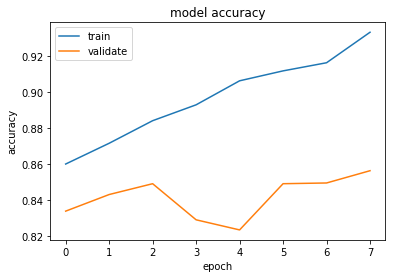

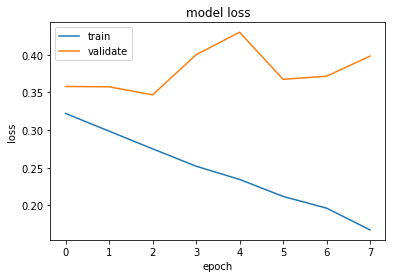

In [74]:
import matplotlib.pyplot as plt   
%matplotlib inline 
classifier.load_weights('saved_models/weights.best.from_new_scratch.hdf5')

plt.plot(history_cnn.history['acc'])
plt.plot(history_cnn.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

### Test the Model

In [72]:
classifier.load_weights('saved_models/weights.best.from_new_scratch.hdf5')
predictions = [np.argmax(classifier.predict(np.expand_dims(tensor, axis=0))) for tensor in test_images]

### Show the output

Dog Image:


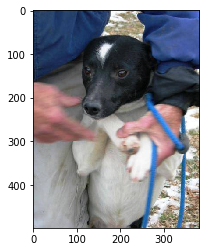

Cat Image:


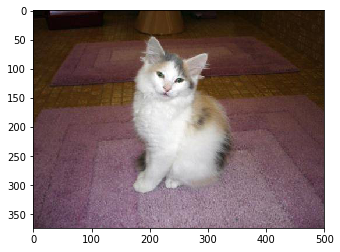

Cat Image:


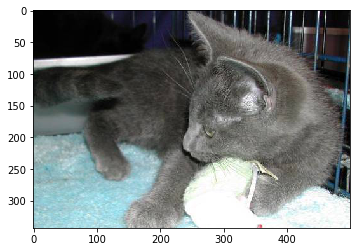

Dog Image:


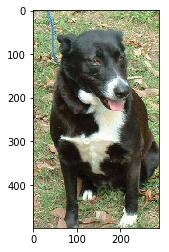

Dog Image:


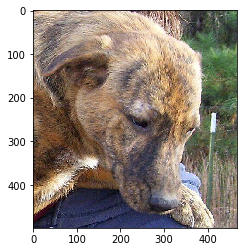

Cat Image:


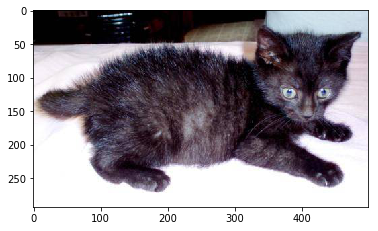

Cat Image:


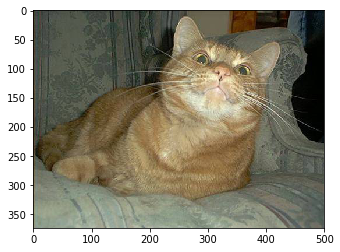

Dog Image:


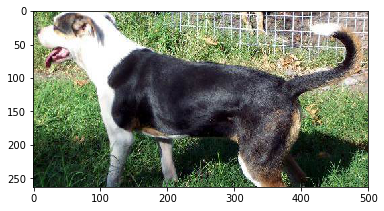

Cat Image:


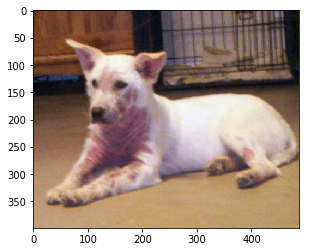

Cat Image:


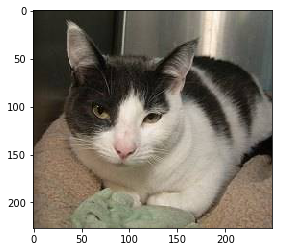

Cat Image:


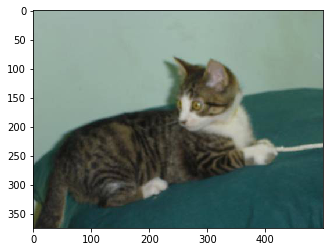

Cat Image:


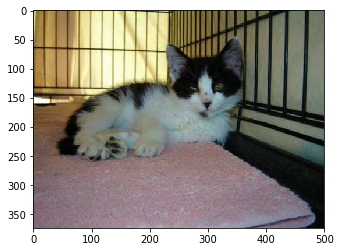

Cat Image:


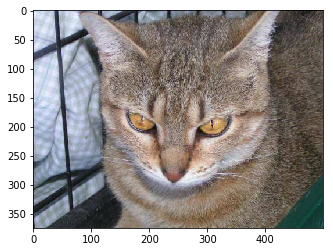

Cat Image:


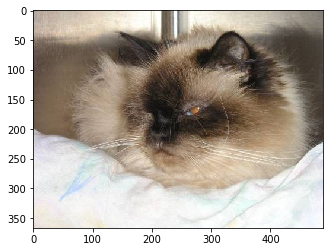

Cat Image:


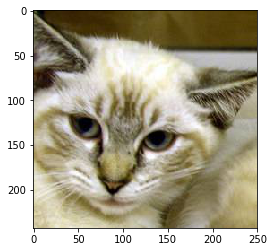

Dog Image:


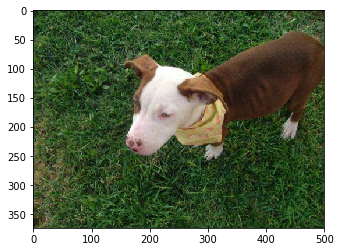

Dog Image:


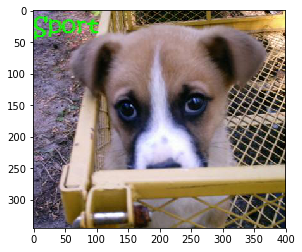

Cat Image:


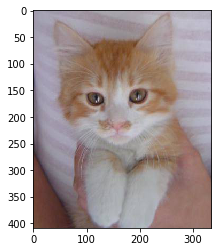

Dog Image:


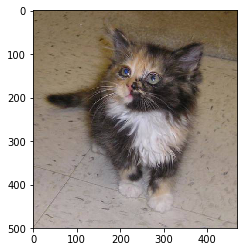

Cat Image:


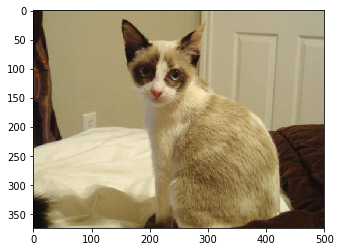

Cat Image:


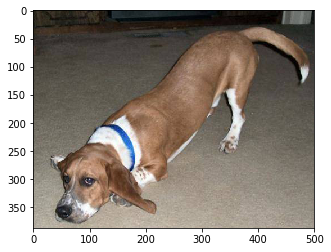

Cat Image:


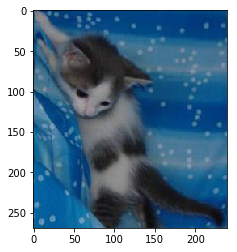

Cat Image:


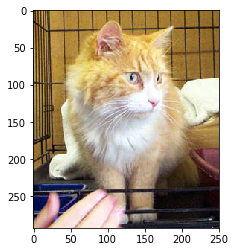

Cat Image:


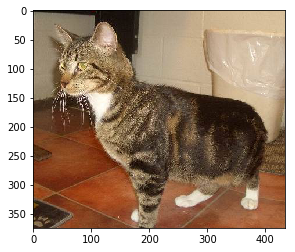

Cat Image:


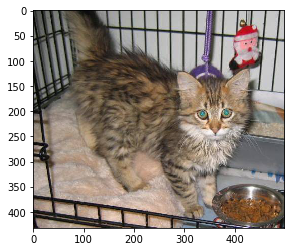

Dog Image:


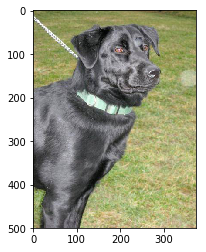

Cat Image:


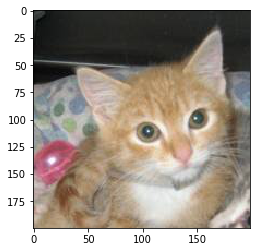

Cat Image:


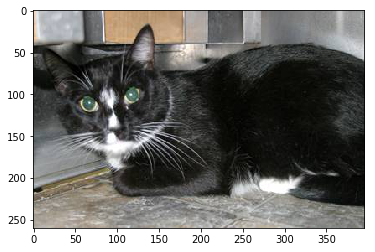

Dog Image:


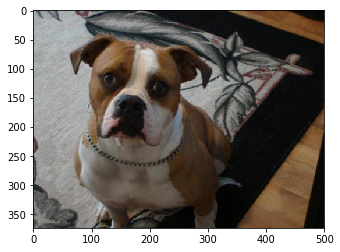

Dog Image:


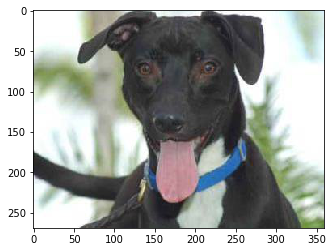

Dog Image:


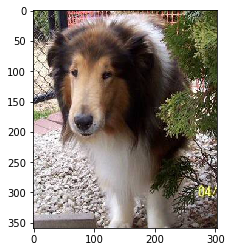

Cat Image:


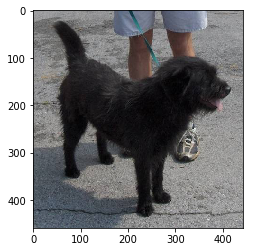

Dog Image:


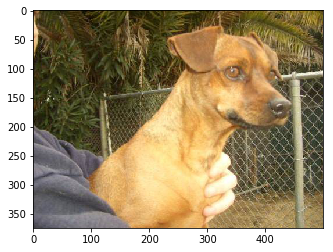

Dog Image:


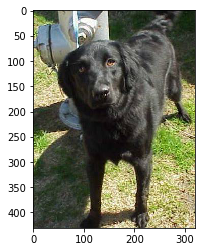

Cat Image:


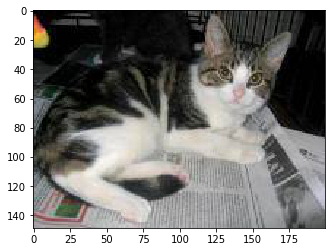

Dog Image:


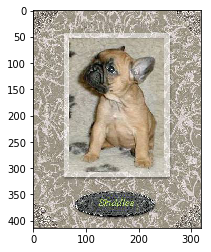

Dog Image:


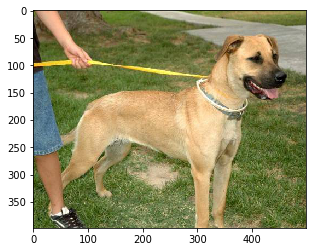

Dog Image:


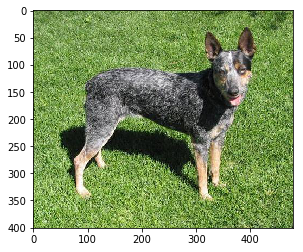

Cat Image:


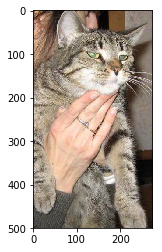

Cat Image:


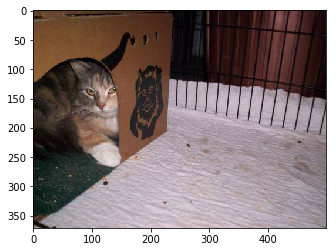

Cat Image:


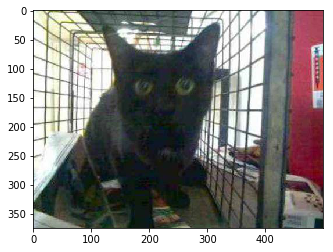

Dog Image:


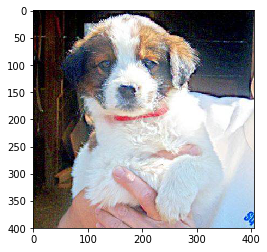

Cat Image:


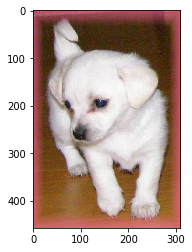

Dog Image:


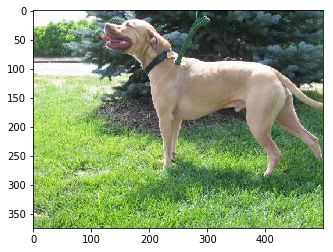

Dog Image:


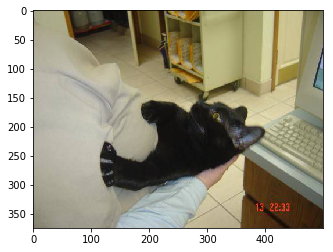

Cat Image:


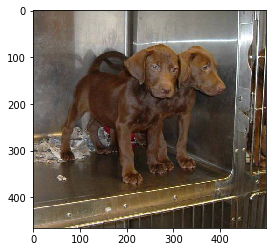

Dog Image:


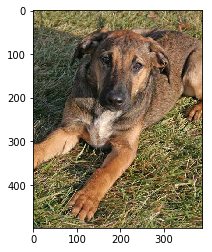

Dog Image:


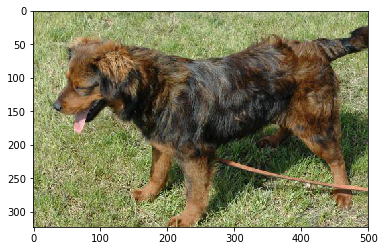

Cat Image:


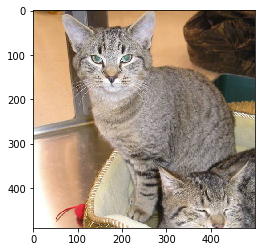

Dog Image:


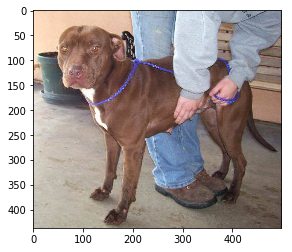

In [100]:
def show_image(img_path):
    img = cv2.imread(img_path) 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
t = 50 
def cat_dog_prediction(test_images, predictions):
    for i in range(t): 
        if predictions[i] == 1:
            print("Dog Image:")
            show_image(test_images[i]) 
        else:
            print("Cat Image:")
            show_image(test_images[i]) 

cat_dog_prediction(test_save[:50], predictions)

The model is able to predict accurately on 23 images out of 25, which gives us a accuracy of 92%.
